In [1]:
from pymicrostructure.markets.continuous import ContinuousDoubleAuction
from pymicrostructure.traders.market_maker import *
from pymicrostructure.traders.informed import *
from pymicrostructure.traders.noise import *
from pymicrostructure.traders.strategy import *

from pymicrostructure.visualization.summary import participant_comparison, price_path
from pymicrostructure.metrics.trader import participants_report

In [2]:
market   = ContinuousDoubleAuction(initial_fair_price=1000)

mm       = BaseMarketMaker(market,
                           fair_price_strategy=OrderFlowMagnitudeFairPrice(window=10, aggressiveness=1),
                           volume_strategy=MaxFractionVolume(fraction=0.1), 
                           spread_strategy=OrderFlowImbalanceSpread(window=5, aggressiveness=10, min_halfspread=3),
                           max_inventory=1000)

informed = TWAPInformedTrader(market)
noise    = NoiseTrader(market, submission_rate=1, volume_size=lambda:np.random.randint(1, 5))

market.run(300)

100%|██████████| 300/300 [00:00<00:00, 15965.93it/s]


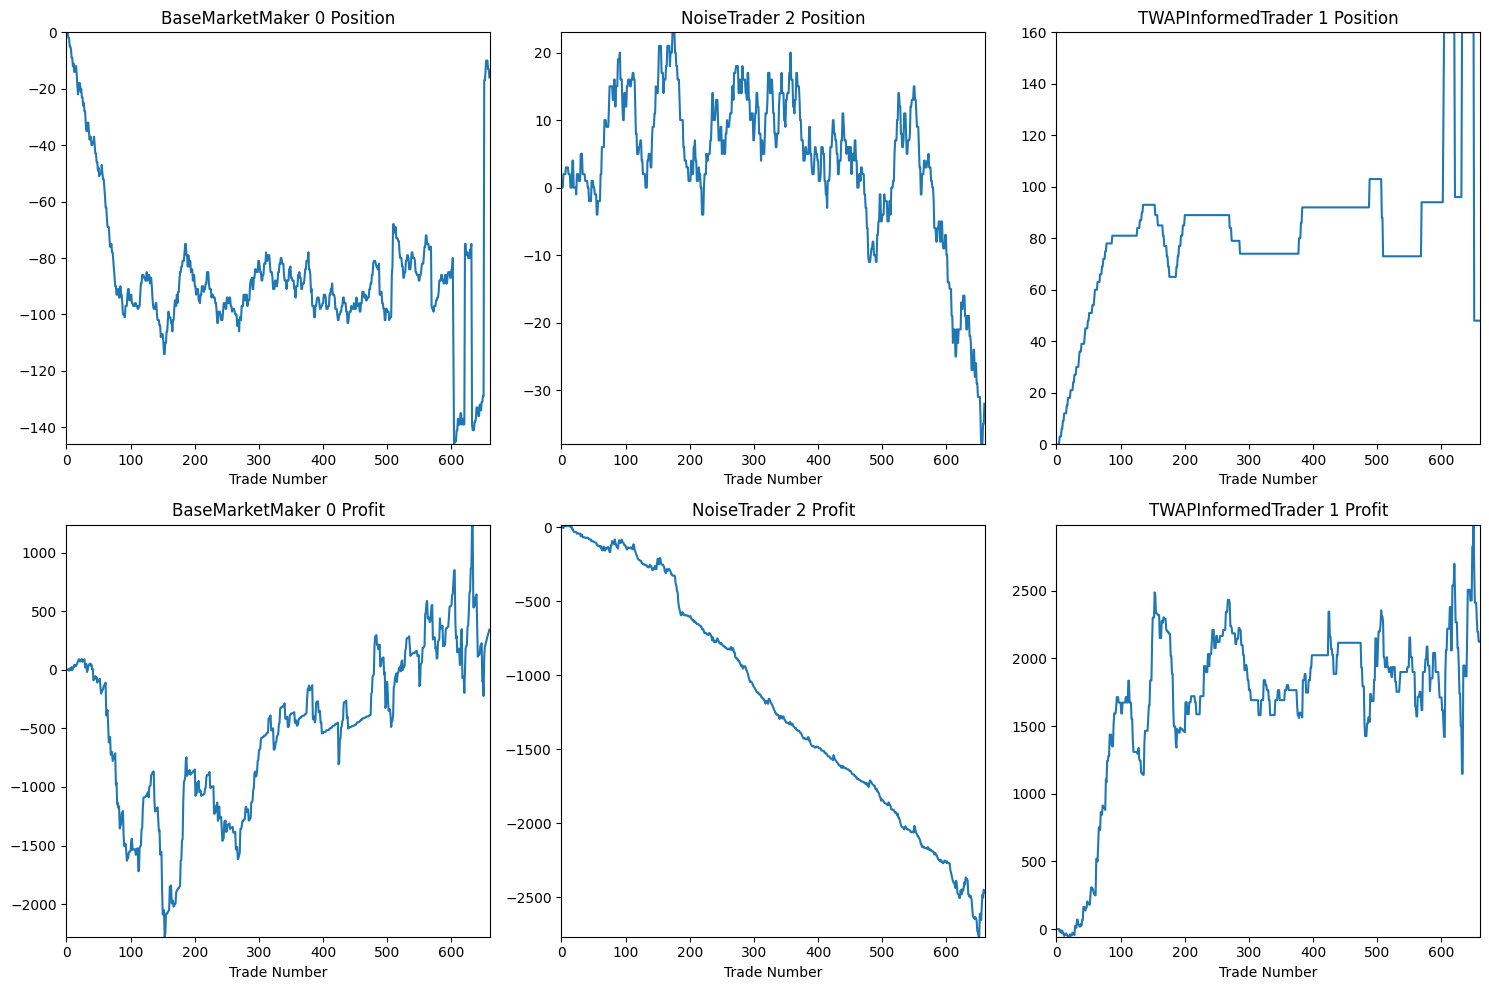

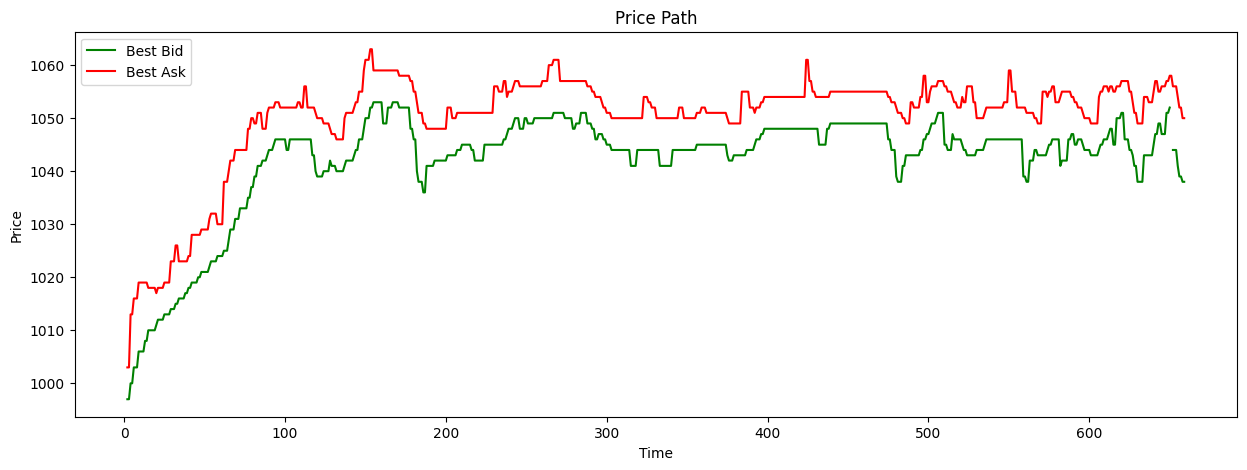

In [3]:
participant_comparison(market.participants)
price_path(market)

In [4]:
participants_report(market.participants)

,BaseMarketMaker_0,NoiseTrader_2,TWAPInformedTrader_1
final_profit,342.00,-2466.00,2124.00
final_position,-16.00,-32.00,48.00
profit_per_state,0.52,-3.74,3.22
std_profit_per_state,86.55,15.42,87.02
information_ratio,0.01,-0.24,0.04
total_trades,358.00,299.00,59.00
volume_traded,1290.00,744.00,546.00
profit_per_volume,0.27,-3.31,3.89
average_trade_size,3.60,2.49,9.25
fill_rate,0.02,1.00,0.82


In [5]:
df = participants_report(market.participants)

In [6]:
from pymicrostructure.metrics.market import quoted_spread

<Axes: >

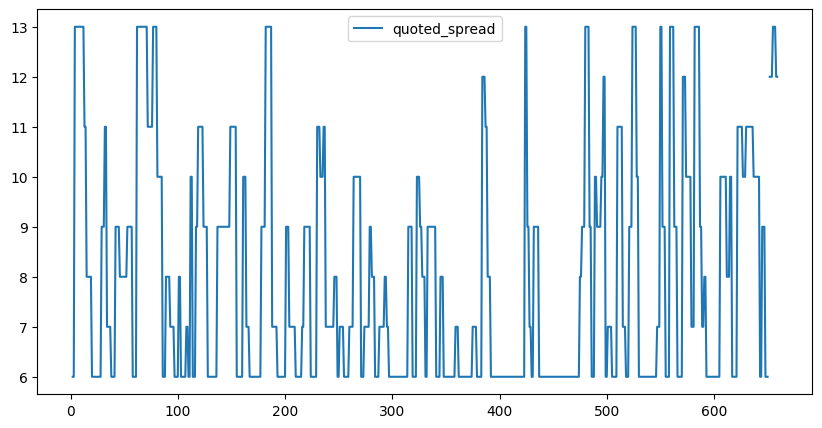

In [7]:
quoted_spread(market).plot(figsize=(10, 5))

In [9]:
market.participants[0].orders[-1].__dict__

{'trader_id': 0,
 'volume': -98,
 'time': 658,
 'status': 'partial',
 'filled': -3,
 'id': 957,
 'price': 1050}